### Capstone 20.6 Step 5 - Data Wrangling & Exploration

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter 
import matplotlib.pyplot as plt

Datasets

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news for 'financial_news.csv'

https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news for 'financial_news_multiple_entity.csv'

https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment for 'twitter_financial_news_train.csv' and 'twitter_financial_news_valid.csv'

In [2]:
# Data Cleaning for 'financial_news.csv'

fin_news_df = pd.read_csv('financial_news.csv', header=None, encoding='latin-1')

fin_news_df.columns = ['Sentiment', 'News Headline']
fin_news_df_reindex = fin_news_df.reindex(columns=['News Headline', 'Sentiment'])
fin_news_df_reindex.index = np.arange(1, len(fin_news_df_reindex) + 1)
fin_news_df_final = fin_news_df_reindex

unique_sentiments = fin_news_df_final['Sentiment'].unique()
display(unique_sentiments)   # Only 3 values seen which is good - ['neutral', 'negative', 'positive']

display(fin_news_df_final)

array(['neutral', 'negative', 'positive'], dtype=object)

,News Headline,Sentiment
1,"According to Gran , the company has no plans t...",neutral
2,Technopolis plans to develop in stages an area...,neutral
3,The international electronic industry company ...,negative
4,With the new production plant the company woul...,positive
5,According to the company 's updated strategy f...,positive
...,...,...
4842,LONDON MarketWatch -- Share prices ended lower...,negative
4843,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4844,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4845,Net sales of the Paper segment decreased to EU...,negative


In [3]:
# Data Cleaning for 'financial_news_multiple_entity.csv'

fin_news_mult_ent_df = pd.read_csv('financial_news_multiple_entity.csv')
fin_news_mult_ent_df = fin_news_mult_ent_df.drop('S No.', axis=1)
fin_news_mult_ent_df.columns = ['News Headline', 'Decisions', 'Words']
fin_news_mult_ent_df.index = np.arange(1, len(fin_news_mult_ent_df) + 1)

print("Original: \n")
display(fin_news_mult_ent_df.head(15))

# Use to compute Sentiment if *all* Sentiments are the same for multiple entities
def rev_dict(d):
    #return({v: k for k, v in json.loads(d).items()})
    new_dict = {v: k for k, v in json.loads(d).items()}
    length = len(new_dict.values())
    #return(new_dict, length)
    if length == 1:
        return(list(new_dict.keys())[0])
    else:
        return("")

fin_news_mult_ent_rd_applied_df = fin_news_mult_ent_df.copy(deep=True)

fin_news_mult_ent_rd_applied_df['Sentiment'] = fin_news_mult_ent_rd_applied_df['Decisions'].apply(rev_dict)

print("'rev_dict' Function Applied: \n")
display(fin_news_mult_ent_rd_applied_df.head(15))

'''
### Alternative Technique ###

dictionaries = fin_news_mult_ent_df_final['Decisions'].tolist()
#print(fin_news_mult_ent_df_final)

count = 0
sentiment_list = []
for text in dictionaries:
    #print(text)
    count += 1
    sentiments = re.findall(r'(neutral|negative|positive)', text)
    if sentiments:
        sentiment_set = set(sentiments)
        if len(sentiment_set) == 1:
            sentiment_list.append(sentiments)
            #print(sentiment_list)   # Will cause VSCode to crash
        else:
            sentiment_list.append('')

    #if count == 15:   # Loop ends after 15 rows
    #    break
print(sentiment_list)

fin_news_mult_ent_df_final['Sentiment'] = sentiment_list
fin_news_mult_ent_df_final['Sentiment'] = fin_news_mult_ent_df_final['Sentiment'].astype(str).str.strip("[]'")
'''

fin_news_mult_ent_dropped_df = fin_news_mult_ent_rd_applied_df.copy(deep=True)

fin_news_mult_ent_dropped_df['Sentiment'].replace('', np.nan, inplace=True)
fin_news_mult_ent_dropped_df.dropna(subset=['Sentiment'], inplace=True)
fin_news_mult_ent_df_final = fin_news_mult_ent_dropped_df

print("Dropped Empty Rows, Final: \n")
display(fin_news_mult_ent_df_final.head(15))

Original: 



,News Headline,Decisions,Words
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7
9,Gold shines on seasonal demand; Silver dull,"{""Gold"": ""positive"", ""Silver"": ""negative""}",7
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7


'rev_dict' Function Applied: 



,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7,neutral
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8,positive
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7,neutral
9,Gold shines on seasonal demand; Silver dull,"{""Gold"": ""positive"", ""Silver"": ""negative""}",7,
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7,neutral


Dropped Empty Rows, Final: 



C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\2548486810.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fin_news_mult_ent_dropped_df['Sentiment'].replace('', np.nan, inplace=True)


,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7,neutral
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8,positive
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7,neutral
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7,neutral
11,"EXL beats profit estimates, cuts sales outlook","{""EXL"": ""positive""}",7,positive


In [4]:
from collections import Counter 

fin_news_mult_ent_df2 = fin_news_mult_ent_df.copy(deep=True)

print("No operations applied: \n")
display(fin_news_mult_ent_df2.head(15))

# Use to compute Sentiment if *most* Sentiments are the same for multiple entities
def most_common(d):
    counts = Counter(json.loads(d).values())
    dict_counts = dict(counts)
    max_value = max(dict_counts.values())
    max_values = [k for k,v in dict_counts.items() if v == max_value]
    if len(max_values) == 1:
        return max_values[0]
    else:
        return("")

fin_news_mult_ent_mc_applied_df2 = fin_news_mult_ent_df2.copy(deep=True)

fin_news_mult_ent_mc_applied_df2['Sentiment'] = fin_news_mult_ent_mc_applied_df2['Decisions'].apply(most_common)

print("'most_common' Function Applied on New Column 'Sentiment2': \n")
display(fin_news_mult_ent_mc_applied_df2.head(15))

fin_news_mult_ent_dropped_df2 = fin_news_mult_ent_mc_applied_df2.copy(deep=True)

fin_news_mult_ent_dropped_df2['Sentiment'].replace('', np.nan, inplace=True)
fin_news_mult_ent_dropped_df2.dropna(subset=['Sentiment'], inplace=True)
fin_news_mult_ent_df2_final = fin_news_mult_ent_dropped_df2

print("Dropped Empty Rows, Final: \n")
display(fin_news_mult_ent_df2_final.head(15))

No operations applied: 



,News Headline,Decisions,Words
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7
9,Gold shines on seasonal demand; Silver dull,"{""Gold"": ""positive"", ""Silver"": ""negative""}",7
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7


'most_common' Function Applied on New Column 'Sentiment2': 



,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7,neutral
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8,positive
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7,neutral
9,Gold shines on seasonal demand; Silver dull,"{""Gold"": ""positive"", ""Silver"": ""negative""}",7,
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7,neutral


Dropped Empty Rows, Final: 



C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\1560183003.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fin_news_mult_ent_dropped_df2['Sentiment'].replace('', np.nan, inplace=True)


,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7,neutral
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8,positive
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7,neutral
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7,neutral
11,"EXL beats profit estimates, cuts sales outlook","{""EXL"": ""positive""}",7,positive


In [5]:
# Data Cleaning for 'twitter_financial_news_train.csv'

twitter_fin_news_train_df = pd.read_csv('twitter_financial_news_train.csv')
twitter_fin_news_train_df.columns = ['News Headline', 'Label']
twitter_fin_news_train_df_final = twitter_fin_news_train_df

conditions = [
    twitter_fin_news_train_df_final['Label'] == 0,
    twitter_fin_news_train_df_final['Label'] == 1,
    twitter_fin_news_train_df_final['Label'] == 2
]

categories = ['negative', 'positive', 'neutral']

twitter_fin_news_train_df_final['Sentiment'] = np.select(conditions, categories, default='')

display(twitter_fin_news_train_df_final)

,News Headline,Label,Sentiment
0,$BYND - JPMorgan reels in expectations on Beyo...,0,negative
1,$CCL $RCL - Nomura points to bookings weakness...,0,negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,negative
3,$ESS: BTIG Research cuts to Neutral https://t....,0,negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,negative
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,neutral
9539,Tupperware Brands among consumer gainers; Unil...,2,neutral
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,neutral
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,neutral


In [6]:
# Data Cleaning for 'twitter_financial_news_valid.csv'

twitter_fin_news_valid_df = pd.read_csv('twitter_financial_news_valid.csv')
twitter_fin_news_valid_df.columns = ['News Headline', 'Label']
twitter_fin_news_valid_df_final = twitter_fin_news_valid_df

conditions = [
    twitter_fin_news_valid_df_final['Label'] == 0,
    twitter_fin_news_valid_df_final['Label'] == 1,
    twitter_fin_news_valid_df_final['Label'] == 2
]

categories = ['negative', 'positive', 'neutral']

twitter_fin_news_valid_df_final['Sentiment'] = np.select(conditions, categories, default='')

display(twitter_fin_news_valid_df_final)

,News Headline,Label,Sentiment
0,$ALLY - Ally Financial pulls outlook https://t...,0,negative
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0,negative
2,$PRTY - Moody's turns negative on Party City h...,0,negative
3,$SAN: Deutsche Bank cuts to Hold,0,negative
4,$SITC: Compass Point cuts to Sell,0,negative
...,...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,2,neutral
2384,Stocks making the biggest moves premarket: Fit...,2,neutral
2385,Stocks making the biggest moves premarket: Hom...,2,neutral
2386,Stocks making the biggest moves premarket: TD ...,2,neutral


In [7]:
# 1. Creating the sentiment data, 'fin_data.csv' with 'rev_dict' applied on multiple entities file data

frames = [fin_news_df_final, fin_news_mult_ent_df_final, twitter_fin_news_train_df_final, twitter_fin_news_valid_df_final]
fin_data_df = pd.concat(frames)
fin_data_df = fin_data_df.drop(columns=['Decisions', 'Words', 'Label'])

fin_data_df = fin_data_df.drop_duplicates(subset=['News Headline'])

unique_sentiments = fin_data_df['Sentiment'].unique()
display(unique_sentiments)   # Only 3 values seen which is good - ['neutral', 'negative', 'positive']

fin_data_df.to_csv('fin_data.csv', index=False)
display(fin_data_df)

array(['neutral', 'negative', 'positive'], dtype=object)

,News Headline,Sentiment
1,"According to Gran , the company has no plans t...",neutral
2,Technopolis plans to develop in stages an area...,neutral
3,The international electronic industry company ...,negative
4,With the new production plant the company woul...,positive
5,According to the company 's updated strategy f...,positive
...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,neutral
2384,Stocks making the biggest moves premarket: Fit...,neutral
2385,Stocks making the biggest moves premarket: Hom...,neutral
2386,Stocks making the biggest moves premarket: TD ...,neutral


In [8]:
# Creating the labeled data, 'fin_data_labeled.csv'

fin_labeled_data_df = pd.read_csv("fin_data.csv")
fin_labeled_data_df['Label'] = fin_labeled_data_df['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})
del fin_labeled_data_df['Sentiment']
fin_labeled_data_df.to_csv('fin_data_labeled.csv', index=False)
display(fin_labeled_data_df)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\4111955463.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_labeled_data_df['Label'] = fin_labeled_data_df['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


,News Headline,Label
0,"According to Gran , the company has no plans t...",2
1,Technopolis plans to develop in stages an area...,2
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1
...,...,...
26223,Stocks making the biggest moves midday: TD Ame...,2
26224,Stocks making the biggest moves premarket: Fit...,2
26225,Stocks making the biggest moves premarket: Hom...,2
26226,Stocks making the biggest moves premarket: TD ...,2


In [9]:
# The following steps are similar to the Mini-project on Exploratory Data Analysis (EDA)

fin_data_df.describe()

,News Headline,Sentiment
count,26228,26228
unique,26228,3
top,"According to Gran , the company has no plans t...",neutral
freq,1,14023


['neutral' 'negative' 'positive']
Sentiment
neutral     14023
positive     7112
negative     5093
Name: count, dtype: int64


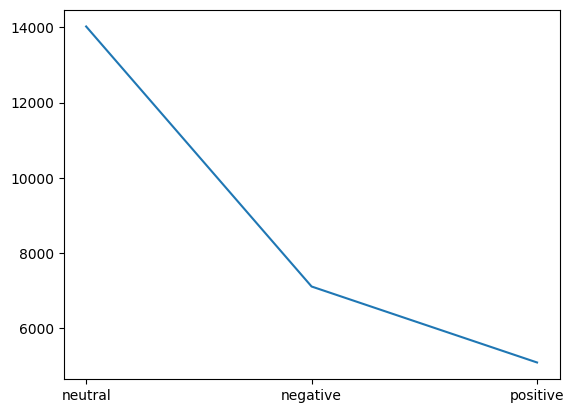

In [10]:
# Plot a Line Graph

x = fin_data_df['Sentiment'].unique()
y = fin_data_df['Sentiment'].value_counts()

print(x)
print(y)
plt.plot(x, y)

In [11]:
# Create subset of the unlabeled data with 'rev_dict' applied - fin_data_df with 5000 negative, 5000 positive, and 5000 neutral random values, 'fin_data_subset.csv'

data_subset_neg_df = fin_data_df.query('(Sentiment == "negative")').sample(n=5000, random_state=0)
data_subset_pos_df = fin_data_df.query('(Sentiment == "positive")').sample(n=5000, random_state=0)
data_subset_neu_df = fin_data_df.query('(Sentiment == "neutral")').sample(n=5000, random_state=0)

subset_frames = [data_subset_neg_df, data_subset_pos_df, data_subset_neu_df]
fin_data_subset_df = pd.concat(subset_frames)
fin_data_subset_df = fin_data_subset_df.sample(frac=1, random_state=0)

fin_data_subset_df.to_csv('fin_data_subset.csv', index=False)
display(fin_data_subset_df)


,News Headline,Sentiment
3733,Everything Is Broken: The Most Profitable Trad...,negative
5838,Amazon Moves Court Seeking Stay On Competition...,neutral
6145,"RBI buys bonds worth Rs 9,092.9 cr under OMO",neutral
4524,Voltas Ltd Q2 net down 1.51 per cent at Rs 42....,negative
6975,L&T Finance Q4 net Up 21.8%,positive
...,...,...
3954,This wood lacquered clock comes with a stripy ...,neutral
10367,"RIL, ONGC shares dip after Election Comission ...",negative
153,$RAPT: BMO Capital Markets starts at Outperform,positive
6293,GSK Consumer Healthcare: Transfer of pricing p...,neutral


In [12]:
# Creating the labeled data subset, 'fin_data_subset_labeled.csv'

fin_labeled_data_subset_df = pd.read_csv("fin_data_subset.csv")
fin_labeled_data_subset_df['Label'] = fin_labeled_data_subset_df['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})
del fin_labeled_data_subset_df['Sentiment']
fin_labeled_data_subset_df.to_csv('fin_data_subset_labeled.csv', index=False)
display(fin_labeled_data_subset_df)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\3770726476.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_labeled_data_subset_df['Label'] = fin_labeled_data_subset_df['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


,News Headline,Label
0,Everything Is Broken: The Most Profitable Trad...,0
1,Amazon Moves Court Seeking Stay On Competition...,2
2,"RBI buys bonds worth Rs 9,092.9 cr under OMO",2
3,Voltas Ltd Q2 net down 1.51 per cent at Rs 42....,0
4,L&T Finance Q4 net Up 21.8%,1
...,...,...
14995,This wood lacquered clock comes with a stripy ...,2
14996,"RIL, ONGC shares dip after Election Comission ...",0
14997,$RAPT: BMO Capital Markets starts at Outperform,1
14998,GSK Consumer Healthcare: Transfer of pricing p...,2


In [13]:
# 2. Creating the sentiment data, 'fin_data2.csv' with 'most_common' applied on multiple entities file data

frames = [fin_news_df_final, fin_news_mult_ent_df2_final, twitter_fin_news_train_df_final, twitter_fin_news_valid_df_final]
fin_data_df2 = pd.concat(frames)
fin_data_df2 = fin_data_df2.drop(columns=['Decisions', 'Words', 'Label'])

fin_data_df2 = fin_data_df2.drop_duplicates(subset=['News Headline'])

unique_sentiments = fin_data_df2['Sentiment'].unique()
display(unique_sentiments)   # Only 3 values seen which is good - ['neutral', 'negative', 'positive']

fin_data_df2.to_csv('fin_data2.csv', index=False)
display(fin_data_df2)

array(['neutral', 'negative', 'positive'], dtype=object)

,News Headline,Sentiment
1,"According to Gran , the company has no plans t...",neutral
2,Technopolis plans to develop in stages an area...,neutral
3,The international electronic industry company ...,negative
4,With the new production plant the company woul...,positive
5,According to the company 's updated strategy f...,positive
...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,neutral
2384,Stocks making the biggest moves premarket: Fit...,neutral
2385,Stocks making the biggest moves premarket: Hom...,neutral
2386,Stocks making the biggest moves premarket: TD ...,neutral


In [14]:
# Creating the labeled data, 'fin_data2_labeled.csv'

fin_labeled_data_df2 = pd.read_csv("fin_data2.csv")
fin_labeled_data_df2['Label'] = fin_labeled_data_df2['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})
del fin_labeled_data_df2['Sentiment']
fin_labeled_data_df2.to_csv('fin_data2_labeled.csv', index=False)
display(fin_labeled_data_df2)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\1390795246.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_labeled_data_df2['Label'] = fin_labeled_data_df2['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


,News Headline,Label
0,"According to Gran , the company has no plans t...",2
1,Technopolis plans to develop in stages an area...,2
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1
...,...,...
26484,Stocks making the biggest moves midday: TD Ame...,2
26485,Stocks making the biggest moves premarket: Fit...,2
26486,Stocks making the biggest moves premarket: Hom...,2
26487,Stocks making the biggest moves premarket: TD ...,2


In [15]:
# The following steps are similar to the Mini-project on Exploratory Data Analysis (EDA)

fin_data_df2.describe()

,News Headline,Sentiment
count,26489,26489
unique,26489,3
top,"According to Gran , the company has no plans t...",neutral
freq,1,14094


['neutral' 'negative' 'positive']
Sentiment
neutral     14094
positive     7242
negative     5153
Name: count, dtype: int64


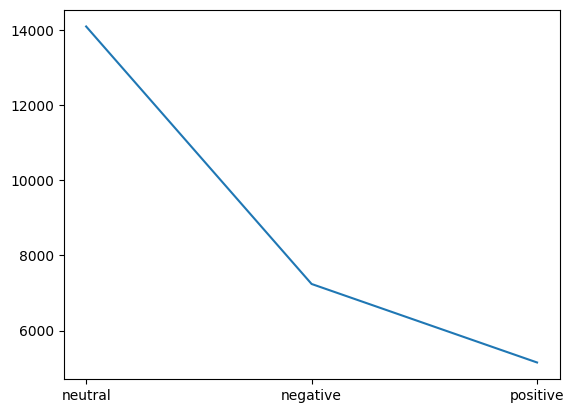

In [16]:
# Plot a Line Graph

x = fin_data_df2['Sentiment'].unique()
y = fin_data_df2['Sentiment'].value_counts()

print(x)
print(y)
plt.plot(x, y)

In [17]:
# Create subset of the unlabeled data with 'rev_dict' applied - fin_data_df with 5000 negative, 5000 positive, and 5000 neutral random values, 'fin_data_subset.csv'

data_subset_neg_df2 = fin_data_df2.query('(Sentiment == "negative")').sample(n=5000, random_state=0)
data_subset_pos_df2 = fin_data_df2.query('(Sentiment == "positive")').sample(n=5000, random_state=0)
data_subset_neu_df2 = fin_data_df2.query('(Sentiment == "neutral")').sample(n=5000, random_state=0)

subset_frames2 = [data_subset_neg_df2, data_subset_pos_df2, data_subset_neu_df2]
fin_data_subset_df2 = pd.concat(subset_frames2)
fin_data_subset_df2 = fin_data_subset_df2.sample(frac=1, random_state=0)

fin_data_subset_df2.to_csv('fin_data_subset2.csv', index=False)
display(fin_data_subset_df2)

,News Headline,Sentiment
782,Boeing's halt to 737 MAX production could ding...,negative
7440,UK politicians face ‘steep learning curve’ on ...,neutral
1280,"LKAB , headquartered in Lulea , Sweden , is a ...",neutral
956,China M&A Bankers Face Another Grim Year,negative
204,"Following the acquisition , Relacom will stren...",positive
...,...,...
2875,Reminder: Altice USA to Hold Conference Call t...,neutral
97,Novo Nordisk downgraded by UBS on concerns ove...,negative
8397,Rane Holdings Q3 net up 13.74 per cent at Rs 1...,positive
1384,The group also plans to launch the 270 room At...,neutral


In [18]:
# Creating the labeled data subset, 'fin_data_subset2_labeled.csv'

fin_labeled_data_subset_df2 = pd.read_csv("fin_data_subset2.csv")
fin_labeled_data_subset_df2['Label'] = fin_labeled_data_subset_df2['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})
del fin_labeled_data_subset_df2['Sentiment']
fin_labeled_data_subset_df2.to_csv('fin_data_subset2_labeled.csv', index=False)
display(fin_labeled_data_subset_df2)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_12012\3719938664.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_labeled_data_subset_df2['Label'] = fin_labeled_data_subset_df2['Sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


,News Headline,Label
0,Boeing's halt to 737 MAX production could ding...,0
1,UK politicians face ‘steep learning curve’ on ...,2
2,"LKAB , headquartered in Lulea , Sweden , is a ...",2
3,China M&A Bankers Face Another Grim Year,0
4,"Following the acquisition , Relacom will stren...",1
...,...,...
14995,Reminder: Altice USA to Hold Conference Call t...,2
14996,Novo Nordisk downgraded by UBS on concerns ove...,0
14997,Rane Holdings Q3 net up 13.74 per cent at Rs 1...,1
14998,The group also plans to launch the 270 room At...,2


Comments from Amal for this Step 5 and future Capstone Steps

- Make Sentiments Even -> 5000 Neutral, Positive, Negative.
    - [DONE with files with 'subset' in the name: fin_data_subset.csv, fin_data_subset_labeled.csv, fin_data_subset2.csv, fin_data_subset2_labeled.csv]

- Text justification -> Explain we can think of overall sentiments for headlines, besides all headline entities have to be the same to be considered on of the three sentiments.
    - [DONE with files with '2' in the name: fin_data2.csv, fin_data2_labeled.csv, fin_data_subset2.csv, fin_data_subset2_labeled.csv]